In [1]:
import ansys.fluent.core as pyfluent
from matplotlib import pyplot as plt
from matplotlib import image
%matplotlib inline

Fluent in solver mode

In [2]:
solver = pyfluent.launch_fluent (precision = "double", processor_count = 4, mode = "solver", show_gui = True)

pyfluent.launcher WARNING: PyFluent Watchdog did not initialize correctly, proceeding without it...


Read the mesh file

In [3]:
solver.file.read_mesh(file_name = "Project_4_FlowCylinder_Re500.msh.h5")

Fast-loading "D:\softwares\ANSYS Inc\ANSYS Student\v231\fluent\fluent23.1.0\\addons\afd\lib\hdfio.bin"
Done.
Multicore SMT processors detected. Processor affinity set!

Reading from MSI:"D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_4_Flow over cylinder\Project_4_FlowCylinder_Re500.msh.h5" in NODE0 mode ...
  Reading mesh ...
      286713 cells,     1 cell zone  ...
         286713 polyhedra cells,  zone id: 606
     1832703 faces,     9 face zones ...
        1744916 polygonal interior faces,  zone id: 605
            780 polygonal wall faces,  zone id: 65
            781 polygonal wall faces,  zone id: 66
            406 polygonal wall faces,  zone id: 63
            406 polygonal wall faces,  zone id: 64
          42292 polygonal symmetry faces,  zone id: 62
          42166 polygonal symmetry faces,  zone id: 61
            478 polygonal pressure-outlet faces,  zone id: 60
            478 polygonal velocity-inlet faces,  zone id: 59
     1556292 nodes,     3 node zones ...

Buil

'*cx-overwrite-prompt?*'

In [4]:
solver.tui.define.units("length","mm")
solver.mesh.check()


 Domain Extents:
   x-coordinate: min (m) = -1.500000e-01, max (m) = 2.500000e-01
   y-coordinate: min (m) = -2.000000e-01, max (m) = 2.000000e-01
   z-coordinate: min (m) = 0.000000e+00, max (m) = 1.000000e-02
 Volume statistics:
   minimum volume (m3): 5.658217e-12
   maximum volume (m3): 5.693739e-07
     total volume (m3): 1.599217e-03
 Face area statistics:
   minimum face area (m2): 1.095939e-09
   maximum face area (m2): 1.153053e-04
 Checking mesh.....................................
Done.

Note: Settings to improve the robustness of pathline and
      particle tracking have been automatically enabled.



'*the-non-printing-object*'

Check the mesh quality

In [5]:
solver.mesh.quality()

 
Mesh Quality:

Minimum Orthogonal Quality =  2.92538e-01 cell 38682 on zone 606 (ID: 36016 on partition: 0) at location ( 8.62961e-02, -6.68000e-03,  2.61319e-03)

Maximum Aspect Ratio =  1.99363e+01 cell 736 on zone 606 (ID: 69579 on partition: 0) at location ( 1.79969e-01, -1.99875e-01,  6.23002e-03)


False

Setting the unsteady flow simulation parameters

In [6]:
solver.setup.general.solver.time = "unsteady-2nd-order"

Pressure-Velocity Coupling scheme is set to SIMPLE


In [7]:
solver.setup.models.viscous.model = "laminar"
solver.setup.models.viscous()

{'model': 'laminar', 'options': None}

In [8]:
solver.setup.materials()

{'database': {'database_type': 'fluent-database'},
 'fluid': {'air': {'density': {'option': 'constant', 'value': 1.225},
   'viscosity': {'option': 'constant', 'value': 1.7894e-05},
   'specific_heat': {'option': 'constant', 'value': 1006.43},
   'thermal_conductivity': {'option': 'constant', 'value': 0.0242},
   'molecular_weight': {'option': 'constant', 'value': 28.966},
   'therm_exp_coeff': {'option': 'constant', 'value': 0},
   'speed_of_sound': {'option': 'none'}}},
 'solid': {'aluminum': {'density': {'option': 'constant', 'value': 2719},
   'specific_heat': {'option': 'constant', 'value': 871},
   'thermal_conductivity': {'option': 'constant', 'value': 202.4}}}}

In [9]:
# setting the velocity magnitude as 10 m/s
solver.setup.boundary_conditions.velocity_inlet['inlet'].vmag = 0.75
solver.setup.boundary_conditions.velocity_inlet['inlet'].initial_gauge_pressure = 0
# check, if the velocity magnitude has been changed
solver.setup.boundary_conditions.velocity_inlet()

{'inlet': {'velocity_spec': 'Magnitude, Normal to Boundary',
  'frame_of_reference': 'Absolute',
  'vmag': {'option': 'value', 'value': 0.75},
  'initial_gauge_pressure': {'option': 'value', 'value': 0}}}

In [10]:
solver.setup.boundary_conditions.pressure_outlet['outlet'].gauge_pressure = 0
solver.setup.boundary_conditions.pressure_outlet()

{'outlet': {'frame_of_reference': 'Absolute',
  'gauge_pressure': {'option': 'value', 'value': 0},
  'p_profile_multiplier': 1.0,
  'direction_spec': 'Normal to Boundary',
  'p_backflow_spec_gen': 'Total Pressure',
  'prevent_reverse_flow': False,
  'radial': False,
  'avg_press_spec': False,
  'targeted_mf_boundary': False}}

In [11]:
solver.solution.initialization.hybrid_initialize()


Initialize using the hybrid initialization method.

Checking case topology... 
-This case has both inlets & outlets 
-Pressure information is not available at the boundaries.
 Case will be initialized with constant pressure

	iter		scalar-0

	1		1.000000e+00
	2		1.323844e-04
	3		1.293860e-05
	4		4.717400e-06
	5		6.139044e-07
	6		2.144631e-07
	7		2.169034e-08
	8		4.848507e-09
	9		9.204788e-10
	10		1.949478e-10

Hybrid initialization is done.


In [13]:
solver.solution.run_calculation()

{'data_sampling': {'data_sampling': False},
 'transient_controls': {'type': 'Fixed',
  'method': 'User-Specified',
  'max_iter_per_time_step': 20,
  'time_step_count': 0,
  'time_step_size': 1.0,
  'solution_status': False,
  'extrapolate_vars': False,
  'predict_next': False,
  'fixed_periodic': {'fixed_periodic': False},
  'multiphase_specific_time_constraints': {'physics_based_constraint': False},
  'solid_time_step_size': {'enable_solid_time_step': False}},
 'pseudo_time_settings': {'verbosity': 0},
 'reporting_interval': 1}

Changing the Under-relaxation factor for the Pressure and Momentum term

In [60]:
solver.solution.controls.under_relaxation['pressure'] =  0.5
solver.solution.controls.under_relaxation['mom'] =  0.9

Chnaging the discretization scheme for solving Momentum equations 

In [73]:
solver.solution.methods.discretization_scheme['mom'] = "third-order-muscl"

Setting the transient flow solver controls

In [74]:
solver.solution.run_calculation.transient_controls.time_step_size = 0.002

In [75]:
solver.solution.run_calculation.transient_controls.time_step_count = 500

In [76]:
solver.solution.run_calculation.transient_controls.max_iter_per_time_step = 30

In [77]:
solver.solution.run_calculation.calculate()


Updating solution at time levels N and N-1.
 done.

  iter  continuity  x-velocity  y-velocity  z-velocity     time/iter
     1  1.0000e+00  2.2293e-04  5.6660e-05  2.0481e-06  0:00:29   29
     2  1.0000e+00  7.2469e-05  4.0305e-05  9.8089e-06  0:00:34   28
     3  9.2470e-01  3.5241e-05  2.5938e-05  6.0137e-06  0:00:26   27
     4  8.4627e-01  2.2640e-05  1.9449e-05  4.0185e-06  0:00:25   26
     5  7.1702e-01  1.5218e-05  1.3487e-05  2.7251e-06  0:00:19   25
     6  5.2260e-01  1.0460e-05  9.8419e-06  1.9755e-06  0:00:20   24
     7  3.5055e-01  6.8187e-06  5.9399e-06  1.3958e-06  0:00:15   23
     8  2.0835e-01  3.9676e-06  3.4882e-06  9.4723e-07  0:00:16   22
     9  1.2734e-01  2.6938e-06  2.1909e-06  6.9815e-07  0:00:12   21
    10  8.7760e-02  1.7370e-06  1.4063e-06  4.4162e-07  0:00:13   20
    11  6.1799e-02  1.3818e-06  1.0571e-06  3.3672e-07  0:00:10   19

  iter  continuity  x-velocity  y-velocity  z-velocity     time/iter
    12  4.0508e-02  9.6563e-07  7.3860e-07  2.395

'raise-window?'

In [78]:
solver.file.write(file_type = 'case-data', file_name = "Project_4_FlowCylinder_Re500.cas.h5")


Writing to MSI:"D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_4_Flow over cylinder\Project_4_FlowCylinder_Re500.cas.h5" in NODE0 mode and compression level 1 ...
  Done.      286713 cells,     1 zone  ...
     1832703 faces,     9 zones ...
     1556292 nodes,     1 zone  ...
  Done.
Done.

Writing to MSI:"D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_4_Flow over cylinder\Project_4_FlowCylinder_Re500.dat.h5" in NODE0 mode and compression level 1 ...
  Writing results.
Done.


'*cx-overwrite-prompt?*'

Graphs generation in Fluent Solver

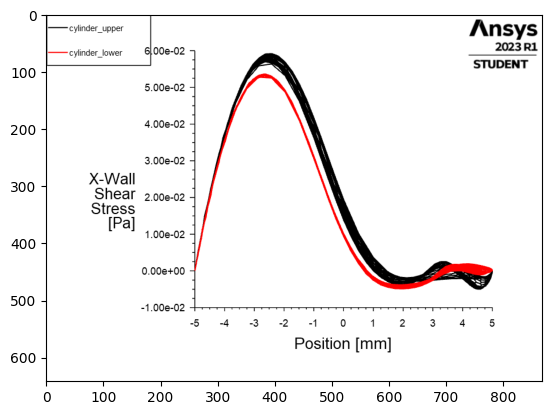

In [82]:
solver.results.plot.xy_plot.create("x-wall-shear-stress_Re500")
solver.results.plot.xy_plot["x-wall-shear-stress_Re500"](y_axis_function = "x-wall-shear", surfaces_list = ["cylinder_upper", "cylinder_lower"])
solver.results.plot.xy_plot["x-wall-shear-stress_Re500"].display()
solver.results.graphics.picture.save_picture(file_name = "x-Wall shear stess-plot_Re500")
plt.imshow(image.imread("x-Wall shear stess-plot_Re500.png"))

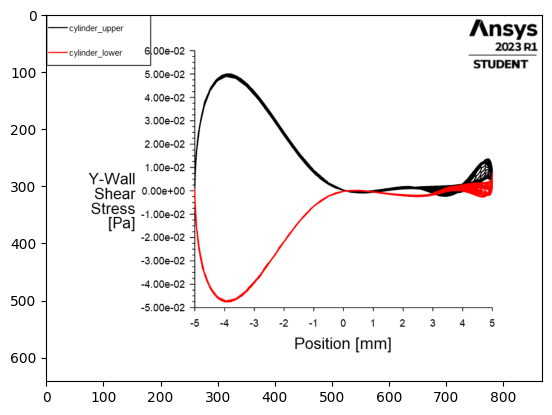

In [83]:
solver.results.plot.xy_plot.create("y-wall-shear-stress_Re500")
solver.results.plot.xy_plot["y-wall-shear-stress_Re500"](y_axis_function = "y-wall-shear", surfaces_list = ["cylinder_upper", "cylinder_lower"])
solver.results.plot.xy_plot["y-wall-shear-stress_Re500"].display()
solver.results.graphics.picture.save_picture(file_name = "y-Wall shear stess-plot_Re500")
plt.imshow(image.imread("y-Wall shear stess-plot_Re500.png"))

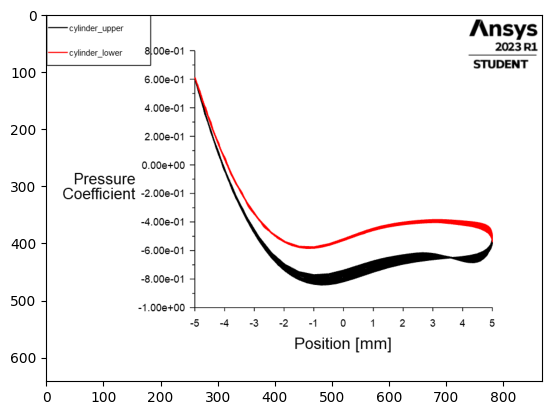

In [84]:
solver.results.plot.xy_plot.create("Pressure-coeff_Re500")
solver.results.plot.xy_plot["Pressure-coeff_Re500"](y_axis_function = "pressure-coefficient", surfaces_list = ["cylinder_upper", "cylinder_lower"])
solver.results.plot.xy_plot["Pressure-coeff_Re500"].display()
solver.results.graphics.picture.save_picture(file_name = "Pressure-coeff_Re500")
plt.imshow(image.imread("Pressure-coeff_Re500.png"))

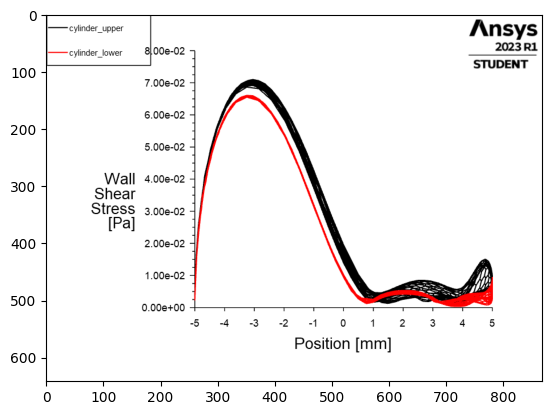


Posting ANSYS Product Improvement Program performance data 
Done.
Shutting down Server...


In [85]:
solver.results.plot.xy_plot.create("wall-shear-stress_Re500")
solver.results.plot.xy_plot["wall-shear-stress_Re500"](y_axis_function = "wall-shear", surfaces_list = ["cylinder_upper", "cylinder_lower"])
solver.results.plot.xy_plot["wall-shear-stress_Re500"].display()
solver.results.graphics.picture.save_picture(file_name = "Wall shear stess-plot_Re500")
plt.imshow(image.imread("Wall shear stess-plot_Re500.png"))